# Sorting algorithms

### Time vs Array length  
In order to be able to visualize how much time an algorithm requires on different array lengths, let's create a function.

In [22]:
import numpy as np
import time
import matplotlib.pyplot as plt

def time_vs_len(sorting_algorithm):    
    # define list to store time
    times = np.array([])
    lengths = np.array([])
    
    l = 2
    while l < 1000:
        # define average time
        avg_time = 0
        
        for i in range(10):
            # create array to run algorithm on
            array = np.random.randint(low=0, high=100000, size=l)

            t1 = time.time()
            sorting_algorithm(array)
            t2 = time.time()
            
            avg_time += (t2 - t1) / 10
        
        times = np.append(times, avg_time)
        lengths = np.append(lengths, l)
        
        # update l
        l += 20
            
    return (lengths, times)

### Insertion sort  
Worst-case performance: O(n^2) - when array is reversed  
Best-case performance: O(n) - when array is already sorted
_________
https://en.wikipedia.org/wiki/Insertion_sort  
https://www.toptal.com/developers/sorting-algorithms/insertion-sort  

In [24]:
def insertion_sort(array):
    # break if it contains only one element
    if len(array) > 1:
    
        for j in range(1, len(array)):
            # store element
            key = array[j]

            # get index for previous element
            i = j - 1

            # move i element right if it's greater then j element (key)
            # repeat as long as left element exists
            while array[i] > key and i >= 0:
                array[i + 1] = array[i]
                i -= 1

            array[i + 1] = key

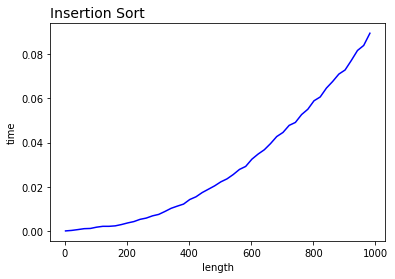

In [28]:
l_insertion, t_insertion = time_vs_len(insertion_sort)

plt.plot(l_insertion, t_insertion, c='blue')
plt.xlabel('length')
plt.ylabel('time')
plt.title('Insertion Sort', loc='left', fontsize=14);

### Selection sort  
Worst-case performance: O(n^2)  
Best-case performance: O(n^2)
_________
https://en.wikipedia.org/wiki/Selection_sort  
https://www.toptal.com/developers/sorting-algorithms/selection-sort

In [16]:
def selection_sort(array):
    # store len of the array as a variable, as we need to call it at least j times (running second for loop)
    array_len = len(array)

    # break if it contains only one element
    if len(array) > 1:

        for j in range(array_len):
            min_i = j

            for i in range(j + 1, array_len):
                # check all following elements and update min_i when array[i] is smaller than aaray[j]
                if array[i] < array[min_i]:
                    min_i = i

            # swap j and min_i elements
            array[j], array[min_i] = array[min_i], array[j]

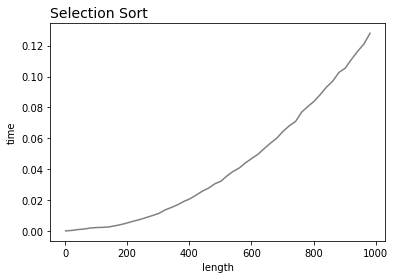

In [27]:
l_selection, t_selection = time_vs_len(selection_sort)

plt.plot(l_selection, t_selection, c='grey')
plt.xlabel('length')
plt.ylabel('time')
plt.title('Selection Sort', loc='left', fontsize=14);

### Bubble sort  
Worst-case performance: O(n^2)  
Best-case performance: O(n)
_________
https://en.wikipedia.org/wiki/Bubble_sort   
https://www.toptal.com/developers/sorting-algorithms/bubble-sort

In [47]:
def bubble_sort(array):
    # store len of the array as a variable, as we need to call it at least j times (running second for loop)
    array_len = len(array)

    # return array if it contains only one element
    if len(array) > 1:
  
        # repeat n times = array_len
        for j in range(array_len):
            swaps = False

            # check all elements except already checked
            for i in range(array_len - j - 1):

                # swap elements if left element if bigger than the right one
                if array[i] > array[i + 1] :
                    array[i], array[i + 1] = array[i + 1], array[i]
                    swaps = True

            # break if no swaps during whole inner loop
            if swaps == False:
                break

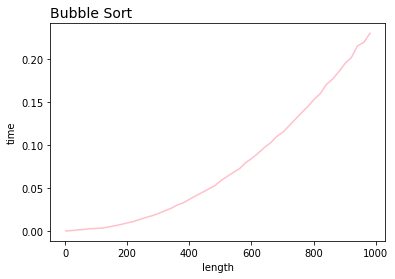

In [52]:
l_bubble, t_bubble = time_vs_len(bubble_sort)

plt.plot(l_bubble, t_bubble, c='pink')
plt.xlabel('length')
plt.ylabel('time')
plt.title('Bubble Sort', loc='left', fontsize=14);

### Shell sort  
Worst-case performance: O(n^2)  
Best-case performance: O(n log n)
_________
https://en.wikipedia.org/wiki/Shellsort   
https://www.toptal.com/developers/sorting-algorithms/shell-sort  
# TBD

### Heap sort  
Worst-case performance: O(n log n)  
Best-case performance: O(n log n)
_________
https://en.wikipedia.org/wiki/Heapsort   
https://www.toptal.com/developers/sorting-algorithms/heap-sort  
# TBD

### Quick sort  
Worst-case performance: O(n^2)  
Best-case performance: O(n log n)
_________
https://en.wikipedia.org/wiki/Quicksort   
https://www.toptal.com/developers/sorting-algorithms/quick-sort  
# TBD

### Merge sort  
Worst-case performance: O(n log n)  
Best-case performance: O(n log n)
_________
https://en.wikipedia.org/wiki/Merge_sort   
https://www.toptal.com/developers/sorting-algorithms/merge-sort  
# TBD